### Required Questions: Please answer completely all four required questions.

#### Question 1
Programmatically download and load into your favorite analytical tool the trip data for September 2015.
Report how many rows and columns of data you have loaded.

#### Question 2
Plot a histogram of the number of the trip distance ("Trip Distance").
Report any structure you find and any hypotheses you have about that structure.

#### Question 3
Report mean and median trip distance grouped by hour of day.
We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

#### Question 4
Build a derived variable for tip as a percentage of the total fare.
Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

In [9]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trip = pd.read_csv('./data/green_tripdata_2015-09.csv')

In [3]:
trip.shape

(1494926, 21)

In [4]:
trip.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type '],
      dtype='object')

In [5]:
trip.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [6]:
trip.Trip_distance.describe()

count    1.494926e+06
mean     2.968141e+00
std      3.076621e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
max      6.031000e+02
Name: Trip_distance, dtype: float64

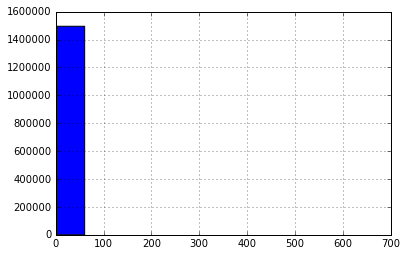

In [10]:
trip.Trip_distance.hist()

{'boxes': [<matplotlib.lines.Line2D at 0x110ac1050>],
 'caps': [<matplotlib.lines.Line2D at 0x110ac1dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1177de110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1177d0a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x110ab0f10>,
  <matplotlib.lines.Line2D at 0x110ac1790>]}

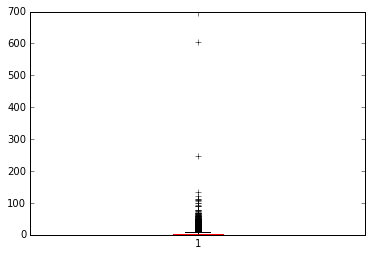

In [11]:
plt.boxplot(trip.Trip_distance)

In [17]:
trip[trip.Trip_distance > 600]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
1321961,1,2015-09-27 03:13:48,2015-09-27 03:24:12,N,1,-73.937164,40.804386,-73.901382,40.819443,1,...,1.25,0.5,0.5,0.0,0.0,NaN,0.3,2.55,2,1.0


In [18]:
trip.iloc[1321961,:]

VendorID                                   1
lpep_pickup_datetime     2015-09-27 03:13:48
Lpep_dropoff_datetime    2015-09-27 03:24:12
Store_and_fwd_flag                         N
RateCodeID                                 1
Pickup_longitude                    -73.9372
Pickup_latitude                      40.8044
Dropoff_longitude                   -73.9014
Dropoff_latitude                     40.8194
Passenger_count                            1
Trip_distance                          603.1
Fare_amount                             1.25
Extra                                    0.5
MTA_tax                                  0.5
Tip_amount                                 0
Tolls_amount                               0
Ehail_fee                                NaN
improvement_surcharge                    0.3
Total_amount                            2.55
Payment_type                               2
Trip_type                                  1
Name: 1321961, dtype: object

In [28]:
col = ['lpep_pickup_datetime','Lpep_dropoff_datetime','Pickup_longitude','Pickup_latitude',
       'Dropoff_longitude','Dropoff_latitude','Passenger_count','Trip_distance','Fare_amount',
       'Tip_amount','Tolls_amount','Total_amount','Payment_type']

In [29]:
trip[trip.Trip_distance > 100][col]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Tip_amount,Tolls_amount,Total_amount,Payment_type
478080,2015-09-10 21:15:00,2015-09-11 00:52:07,-73.871719,40.771744,-76.121590,42.799343,1,246.28,300.00,77.44,9.75,387.19,1
516757,2015-09-11 17:22:50,2015-09-11 20:39:48,-73.937775,40.800926,-72.269753,40.928116,1,120.13,316.00,0.00,0.00,317.80,2
885097,2015-09-18 20:21:27,2015-09-18 22:36:04,-73.958954,40.819847,-72.258629,40.930805,1,100.74,258.50,0.00,0.00,259.80,2
944537,2015-09-19 18:49:29,2015-09-19 21:06:23,-73.961609,40.805958,-72.261024,41.917648,1,134.70,342.50,102.95,0.00,446.25,1
1077032,2015-09-22 10:30:53,2015-09-22 12:28:59,-73.898193,40.749580,-73.899033,40.746319,1,105.65,271.50,0.00,15.29,287.59,2
1282594,2015-09-26 17:23:52,2015-09-27 00:00:00,-73.803436,40.677845,-73.840210,40.719513,2,108.62,180.00,18.08,0.00,198.88,1
1321961,2015-09-27 03:13:48,2015-09-27 03:24:12,-73.937164,40.804386,-73.901382,40.819443,1,603.10,1.25,0.00,0.00,2.55,2
1416994,2015-09-29 10:45:52,2015-09-29 16:55:23,-73.931129,40.693161,-73.936172,40.685581,2,112.60,389.00,0.00,41.08,430.88,1
1432692,2015-09-29 17:01:17,2015-09-29 17:01:19,-73.936172,40.685581,-73.936172,40.685581,1,112.60,20.00,6.35,0.00,27.65,1
1457965,2015-09-30 09:42:56,2015-09-30 09:42:56,-73.914627,40.871475,-73.912315,40.872181,1,108.50,18.00,0.00,0.00,18.30,2


In [30]:
# Remove outlier (600 miles)
trip = trip[trip.Trip_distance < 600]

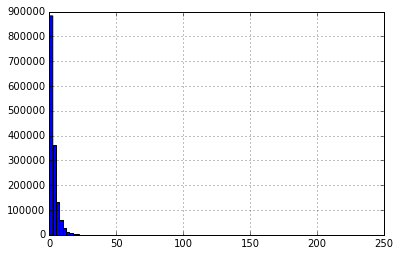

In [38]:
trip.Trip_distance.hist(bins=100)

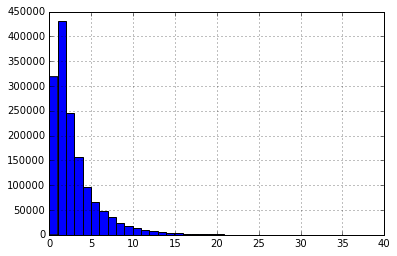

In [44]:
trip[trip.Trip_distance<40].Trip_distance.hist(bins=40)

In [46]:
trip.Trip_distance.median()

1.98

{'boxes': [<matplotlib.lines.Line2D at 0x113d59e10>],
 'caps': [<matplotlib.lines.Line2D at 0x113d66bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x113d74ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x113d74890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x113d59d10>,
  <matplotlib.lines.Line2D at 0x113d66590>]}

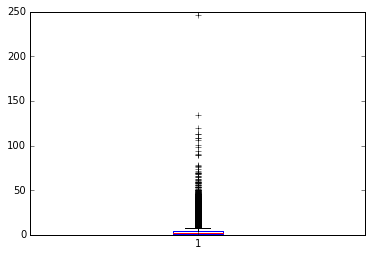

In [32]:
plt.boxplot(trip.Trip_distance)

In [33]:
trip.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1494925
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      4
dtype: int64

In [48]:
len(trip[trip.Tip_amount!=0]), len(trip[trip.Tip_amount==0]), len(trip)

(602770, 892155, 1494925)

In [49]:
len(trip[(trip.Tip_amount>0) & (trip.Tip_amount<1)])

14277

In [52]:
trip['Tip_percentage'] = trip['Tip_amount'] / trip['Total_amount']

In [53]:
trip[trip.Tip_amount>0]['Tip_percentage'].describe()

count    602732.000000
mean          0.164551
std           0.057855
min           0.000083
25%           0.161290
50%           0.166667
75%           0.166708
max           1.000000
Name: Tip_percentage, dtype: float64